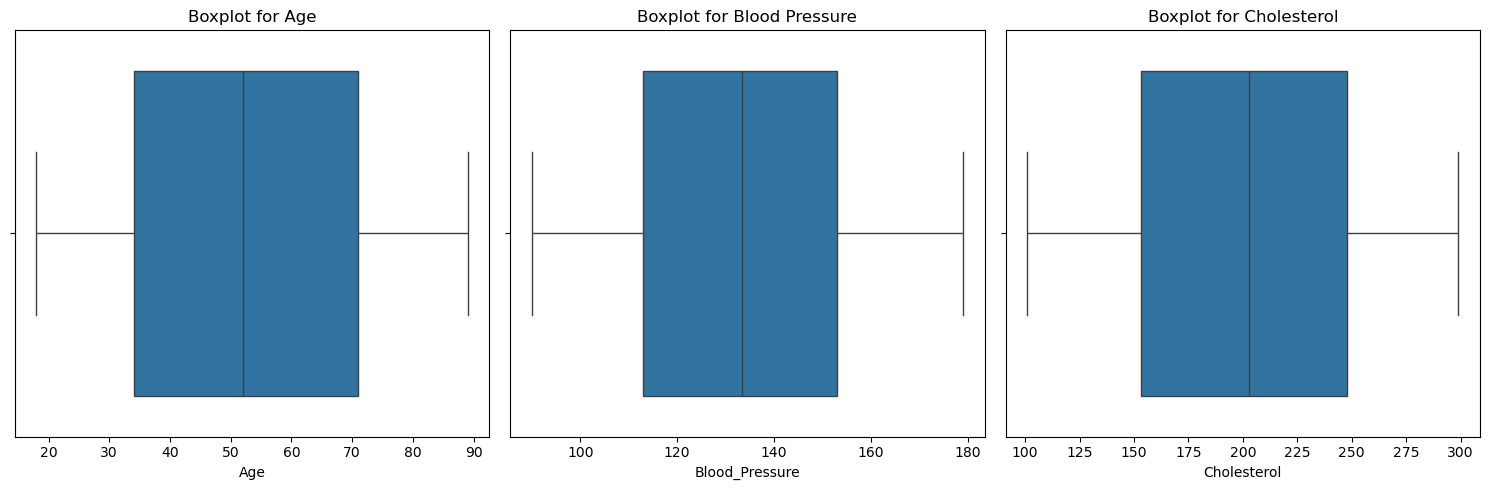

Patient_ID          int64
Age               float64
Gender              int32
Blood_Pressure    float64
Cholesterol       float64
Diabetes            int32
Heart_Disease       int32
dtype: object


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv('Day_16_Healthcare_Data.csv')

# Step 2: Handle Missing Data
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Mean imputation for 'Age'
df['Blood_Pressure'] = df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean())  # Mean imputation for 'Blood_Pressure'
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())  # Mean imputation for 'Cholesterol'
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  # Mode imputation for 'Gender'
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])  # Mode imputation for 'Diabetes'
df['Heart_Disease'] = df['Heart_Disease'].fillna(df['Heart_Disease'].mode()[0])  # Mode imputation for 'Heart_Disease'

# Step 3: Detect and Handle Duplicates
df_cleaned = df.drop_duplicates()

# Step 4: Detect and Handle Outliers using Boxplots (visual check)
plt.figure(figsize=(15, 5))

# Boxplot for 'Age'
plt.subplot(1, 3, 1)
sns.boxplot(data=df_cleaned, x='Age')
plt.title('Boxplot for Age')

# Boxplot for 'Blood_Pressure'
plt.subplot(1, 3, 2)
sns.boxplot(data=df_cleaned, x='Blood_Pressure')
plt.title('Boxplot for Blood Pressure')

# Boxplot for 'Cholesterol'
plt.subplot(1, 3, 3)
sns.boxplot(data=df_cleaned, x='Cholesterol')
plt.title('Boxplot for Cholesterol')

plt.tight_layout()
plt.show()

# Step 5: Remove Outliers (example for Age using IQR method)
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Age'] >= lower_limit) & (df_cleaned['Age'] <= upper_limit)]

# Step 6: Standardize and Normalize Data
# Label Encoding for Categorical Columns
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned['Diabetes'] = label_encoder.fit_transform(df_cleaned['Diabetes'])
df_cleaned['Heart_Disease'] = label_encoder.fit_transform(df_cleaned['Heart_Disease'])

# Scaling Numerical Columns (Min-Max Scaling)
scaler = MinMaxScaler()
df_cleaned[['Age', 'Blood_Pressure', 'Cholesterol']] = scaler.fit_transform(df_cleaned[['Age', 'Blood_Pressure', 'Cholesterol']])

# Step 7: Data Validation
assert df_cleaned.isna().sum().sum() == 0, "There are still missing values."
assert df_cleaned.duplicated().sum() == 0, "There are still duplicates."
print(df_cleaned.dtypes)

# Step 8: Final Data Export
df_cleaned.to_csv('Day_16_Healthcare_Data.csv', index=False)
